<a href="https://colab.research.google.com/github/gonewithharshwinds/emissions-emissions/blob/main/Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRE-REQUISITE
---

Humans have caused a lot of harm to the world over time by manufacturing pollution in numerous forms such as air, sound, water, soil, and so on. Here, we shall focus on the air pollution created by IC engines. Air pollution is described as "the presence of one or more pollutants in sufficient quantities in the earth's atmosphere to produce short- or long-term detrimental impacts to human, animal, plant, and environmental life." Since their inception, automobiles have contributed to environmental degradation by generating air pollution.

The goal of this article is to gather and analyse current trends in the car sector, as well as to deploy an emissions forecast model, using Multivariate Linear Regression. A brief survey of automobiles owned by people was conducted to determine the type of engine utilised, such as gasoline or diesel, engine size, which BS regulations these cars come under, the quantity of pollution they release, and so on.

We see a drastic change in emissions caused by different fuels. Here we are comparing the emissions caused by Diesel, Gasoline, Ethanol and Premium Gasoline. Even in these four fuels there is a reduction in the pollutants emitted at the cost reduction in engine efficiencies. For instance emissions caused by diesel are CO(0.50g/km), NOx(0.25g/km ), HC + NOx together (0.30g/km) whereas gasoline emits CO(1g/km), HC(0.10g/km), NOx(0.08g/km). The ethanol fuel or E85 compared to gasoline emits CO at a reduced by 38%, NOx reduced by around 59% and HC is reduced by around 8% (the CO emissions are more during the winters). These emissions by Premium Gasoline are CO(2.56ppm), HC(0.68ppm), NOx(0.01ppm).

References:
1.	Proprietary research into the use of premium octane gasoline when not required by the manufacturer, American Automobile Association Inc.
2.	https://www.iea-amf.org/content/fuel_information/


**AIM :** Understanding present trends in auto industry and deployment of CO2 Emissions prediction model based on existing data using Multivariate Linear Regression.

# *Car CO2 Emissions Data*
---


## 0.1 DATA COLLECTION

Data Source 1 : https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?datasetId=817556

Data Source 2 : Form link -> https://forms.gle/fEy6zib3ThRz1asV9



In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download debajyotipodder/co2-emission-by-vehicles

co2-emission-by-vehicles.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip co2-emission-by-vehicles

Archive:  co2-emission-by-vehicles.zip
replace CO2 Emissions_Canada.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Data Description.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## 0.2 Data Learning
---
Data is collected and it's datatype, central tendencies, and so on is learnt. Search for nullity and duplication is done. Data is understood better.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [ ]:
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
df.shape

(7385, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
dupes = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(dupes))

There are 1103 duplicated rows in the data


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(['index'],inplace=True,axis=1)

In [ ]:
Nullity = pd.DataFrame({'Nullity': df.isnull().sum(), 'Percentage': (df.isnull().sum() / len(df))*100})

In [ ]:
Nullity.sort_values(by='Percentage', ascending=False)

,Nullity,Percentage
Make,0,0.0
Model,0,0.0
Vehicle Class,0,0.0
Engine Size(L),0,0.0
Cylinders,0,0.0
Transmission,0,0.0
Fuel Type,0,0.0
Fuel Consumption City (L/100 km),0,0.0
Fuel Consumption Hwy (L/100 km),0,0.0
Fuel Consumption Comb (L/100 km),0,0.0


In [ ]:
df.tail(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
6281,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [ ]:
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.shape

(6282, 12)

In [ ]:
df.describe(include=np.number)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## 0.3 Data Inference and Statistics

- 50% cars have smaller than 3 L engine size.
- 75% own <= 6 cylinders.
- Average fuel consumption in combination is 0.11017876 L/km
- Fuel Consumption range : (0.040 - 0.261)(L/km)
- Fuel consumption on city in city > fuel consumption on highway.
- Average CO2 emission : 251.157752 gm/km
- The CO2 emission range lies from 96.0 g/km to 522.0 g/km

### 0.3.1 BASICS

In [ ]:
df.describe(include = object)

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,6282,6282,6282,6282,6282
unique,42,2053,16,27,5
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,577,32,1006,1139,3039


- 42 unique car companies (make) and 20053 unique car models (model)
- Vehicles are divided into 16 unique classes.

In [ ]:
num_features = df.select_dtypes(include=np.number)
print('The numerical columns in the dataset are: ',num_features.columns)

The numerical columns in the dataset are:  Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


### 0.3.2 CORRELATION

In [ ]:
correlation =  num_features.corr()
correlation

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


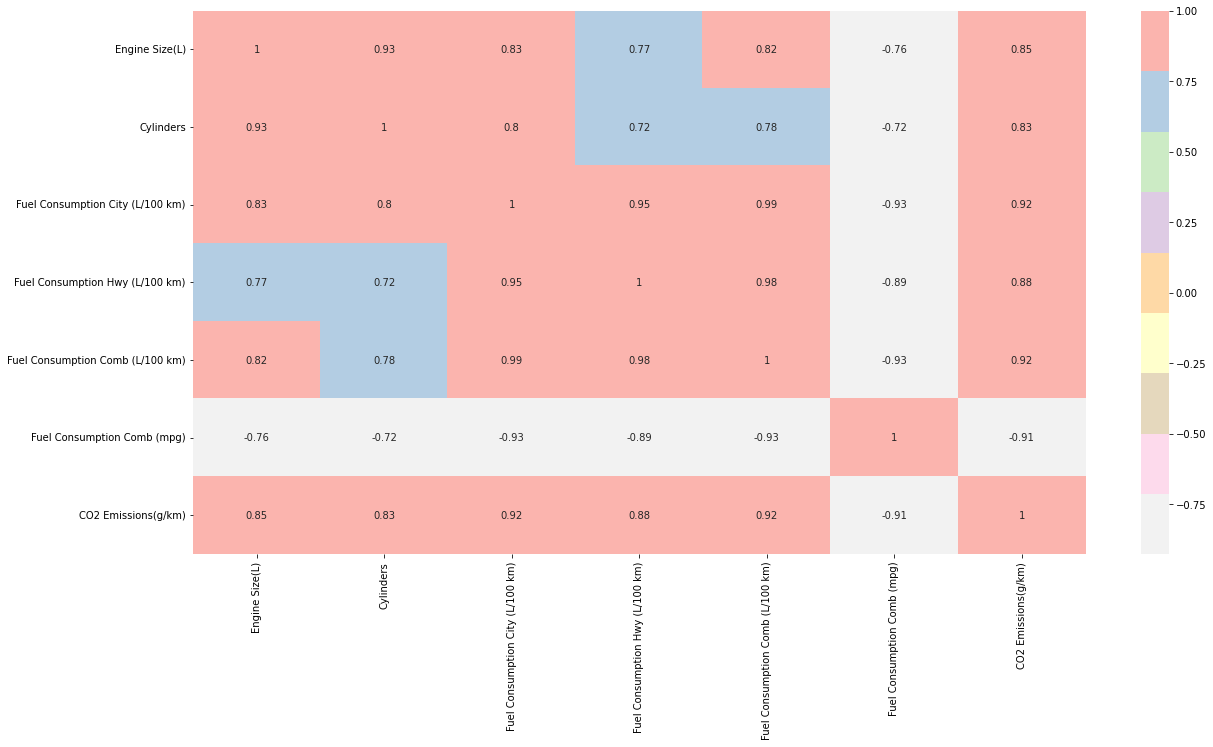

In [ ]:
plt.figure(figsize=(20,10))
correlation =num_features.corr(method='pearson')
sns.heatmap(correlation, annot=True,cmap='Pastel1_r')
plt.show()

- Fuel Consumption Combo has a high negative correaltion(<-0.9) with CO2 Emissions, and Fuel Consumption City.

- CO2 Emissions has high positive correlation (>0.9) with Fuel Consumption Combo and Fuel Consumption City.

### 0.3.3 TOP LISTS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


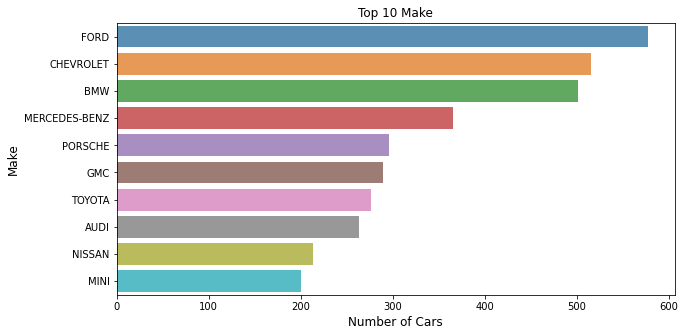

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


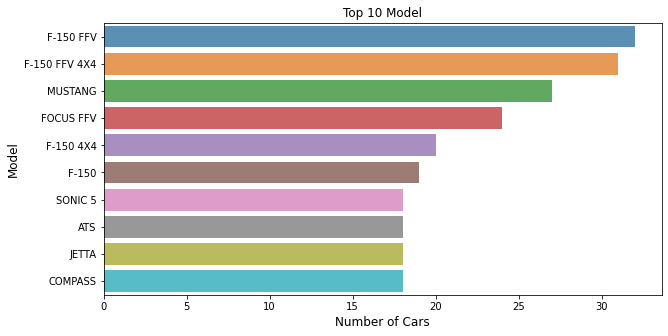

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


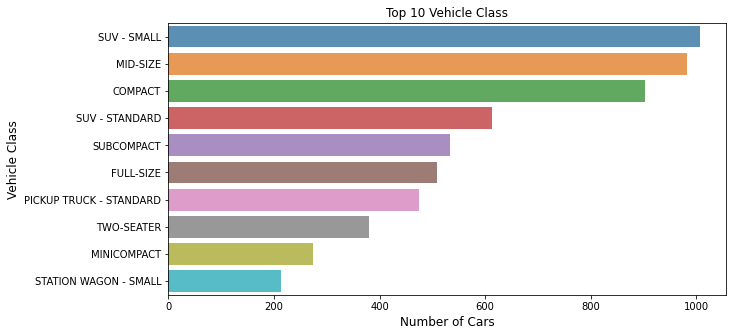

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


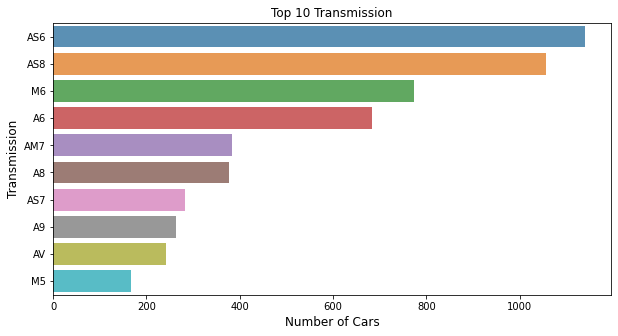

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


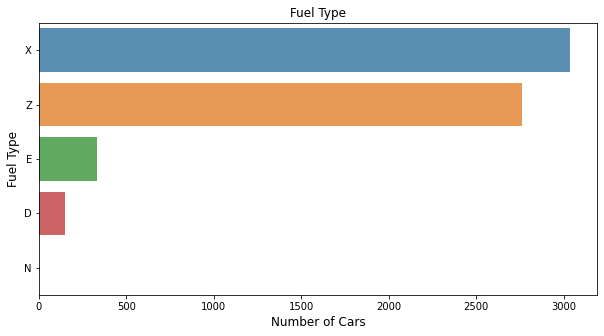

<Figure size 936x576 with 0 Axes>

In [ ]:
catFeatures = df.select_dtypes(include='object')

for variable in catFeatures:
    cat_count  = df[variable].value_counts()
    cat_count10 = cat_count[:10,]
    plt.figure(figsize=(10,5))
    sns.barplot(cat_count10.values,cat_count10.index, alpha=0.8)
    if cat_count.size > 10:
        plt.title('Top 10 {}'.format(variable))
    else:
        plt.title(variable)
    plt.ylabel('{}'.format(variable), fontsize=12)
    plt.xlabel('Number of Cars', fontsize=12)
    plt.show()
    
plt.tight_layout()   
plt.show()

- Top 10 Make: Most of the cars are made by Ford.

- Top 10 Model: The F-150 FFV is amongst the most famous models.

- Top 10 Vehicle_Class: SUV-Small is the preferred class of vehicle.

- Top 10 Transmission: More than 1000 cars have AS6 and AS8 transmission types

- Top Fuel Type: Majority of the cars use Fuel type X and Z



### 0.3.4 DISTRIBUTION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


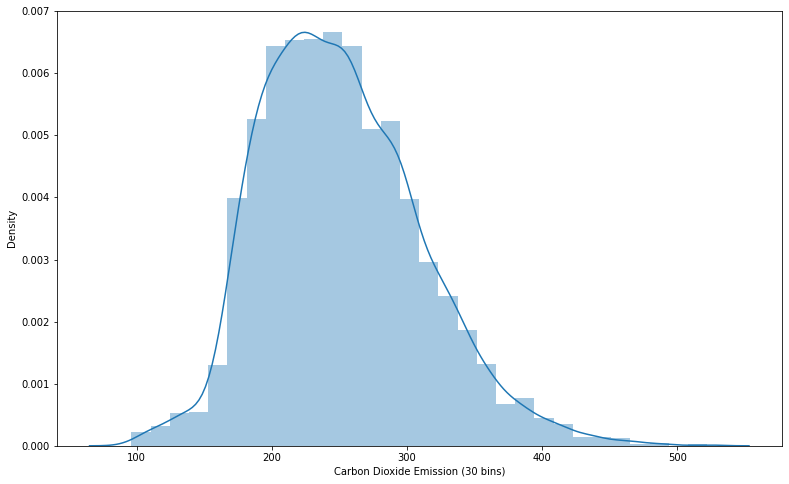

In [ ]:
sns.distplot(df['CO2 Emissions(g/km)'], bins=30, kde=True, axlabel='Carbon Dioxide Emission (30 bins)')

The graph is slightly Positively Skewed

### 0.3.5 CENTRAL TENDENCIES

In [ ]:
print('Central Tendencies')
mean = df['CO2 Emissions(g/km)'].mean()
print('Mean  ',mean)
median = df['CO2 Emissions(g/km)'].median()
print('Median for CO2 Emission is ',median)
mode = df['CO2 Emissions(g/km)'].mode()
print('Mode for CO2 Emission is ',mode)


Central Tendencies
Mean   251.1577523081821
Median for CO2 Emission is  246.0
Mode for CO2 Emission is  0    221
1    246
dtype: int64


### 0.3.6 CATEGORICAL COMPARISONS WITH CO2

Text(0.5, 1.0, 'CO2 Emissions v/s Fuel Type')

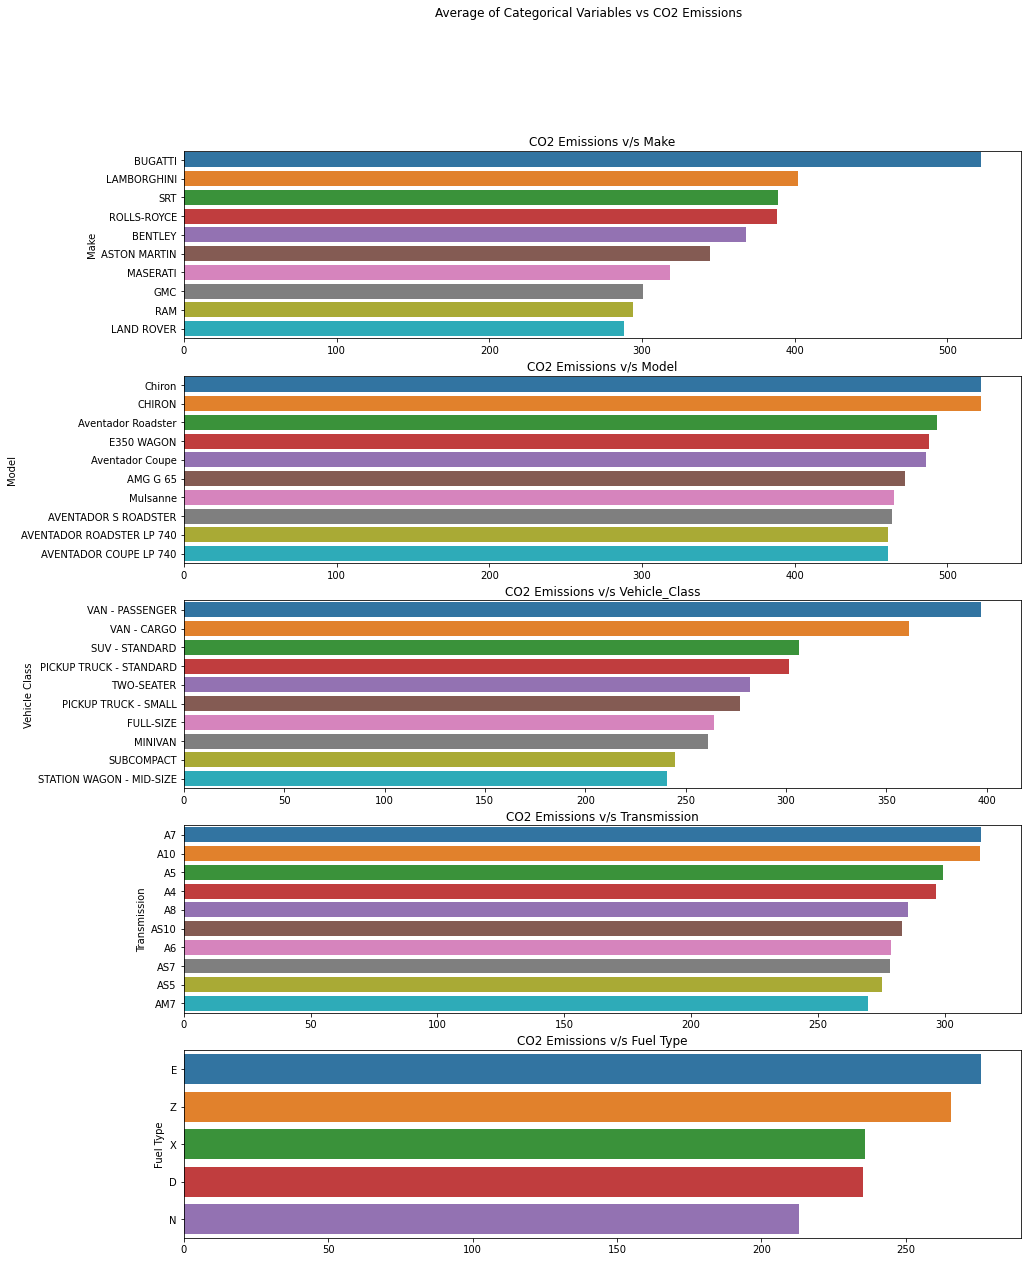

In [ ]:
fig, axes = plt.subplots(5,1, figsize=(15,20))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions')

make_co2 = df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
sns.barplot(ax=axes[0],x = make_co2.values,y = make_co2.index)
axes[0].set_title('CO2 Emissions v/s Make')

model_co2 = df.groupby('Model')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
sns.barplot(ax=axes[1],x = model_co2.values,y = model_co2.index)
axes[1].set_title('CO2 Emissions v/s Model')

vehicle_class_co2 = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
sns.barplot(ax=axes[2],x = vehicle_class_co2.values,y = vehicle_class_co2.index)
axes[2].set_title('CO2 Emissions v/s Vehicle_Class')

transmission_co2 = df.groupby('Transmission')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head(10)
sns.barplot(ax=axes[3],x = transmission_co2.values,y = transmission_co2.index)
axes[3].set_title('CO2 Emissions v/s Transmission')

fuel_type_co2 = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False).head()
sns.barplot(ax=axes[4], x=fuel_type_co2.values,y=fuel_type_co2.index)
axes[4].set_title('CO2 Emissions v/s Fuel Type')

Inferences ✅

CO2 Emissions v/s Make: 
  - While Ford cars are mainly found on the roads of Canada , its Bugatti that emit the most CO2 per car

CO2 Emissions v/s Model: 
  - Bugatti Chiron is amongst the most CO2 emitting car model

CO2 Emissions v/s Vehicle_Class: 
  - Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2

CO2 Emissions v/s Transmission: 
  - Most of the cars with automatic transmission emit CO2

CO2 Emissions v/s Fuel_Type: 
  - Cars using Fuel Type E are emitting the most CO2

### 0.3.7 VIOLIN PLOT

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


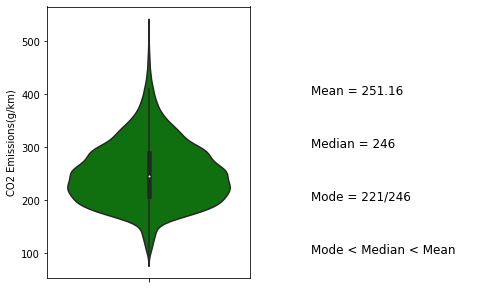

In [ ]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(8,5))
sns.violinplot(y=df['CO2 Emissions(g/km)'], color='g', orient="h", ax = axes[0]);

plt.text(0.1, 200, "Mode = 221/246", fontsize=12)
plt.text(0.1, 300, "Median = 246", fontsize=12)
plt.text(0.1, 400, "Mean = 251.16", fontsize=12)
plt.text(0.1, 100, "Mode < Median < Mean", fontsize=12)

plt.axis("off")

plt.show()

### 0.3.8 SCATTER PLOT (VS CYLINDERS)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


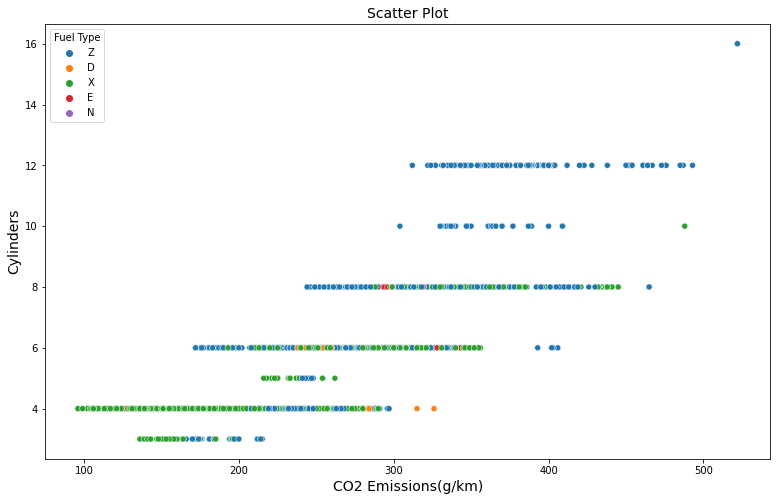

In [ ]:
plt.rcParams["figure.figsize"] = (13,8)
sns.scatterplot('CO2 Emissions(g/km)','Cylinders',data = df,hue='Fuel Type')
plt.xlabel('CO2 Emissions(g/km)', fontsize=14)
plt.ylabel("Cylinders", fontsize=14)
plt.title("Scatter Plot", fontsize=14)
plt.show()

Inference

- no. of cylinders 📈 => CO2_emissions 📈

- Cars <= 8 cylinders -> PREFER Fuel Type X & D (to some extent)
  - impact : less emissions of CO2

- Fuel Type Z -> more CO2 emissions (relative)

### 0.3.9 Pair Plots

<Figure size 720x360 with 0 Axes>

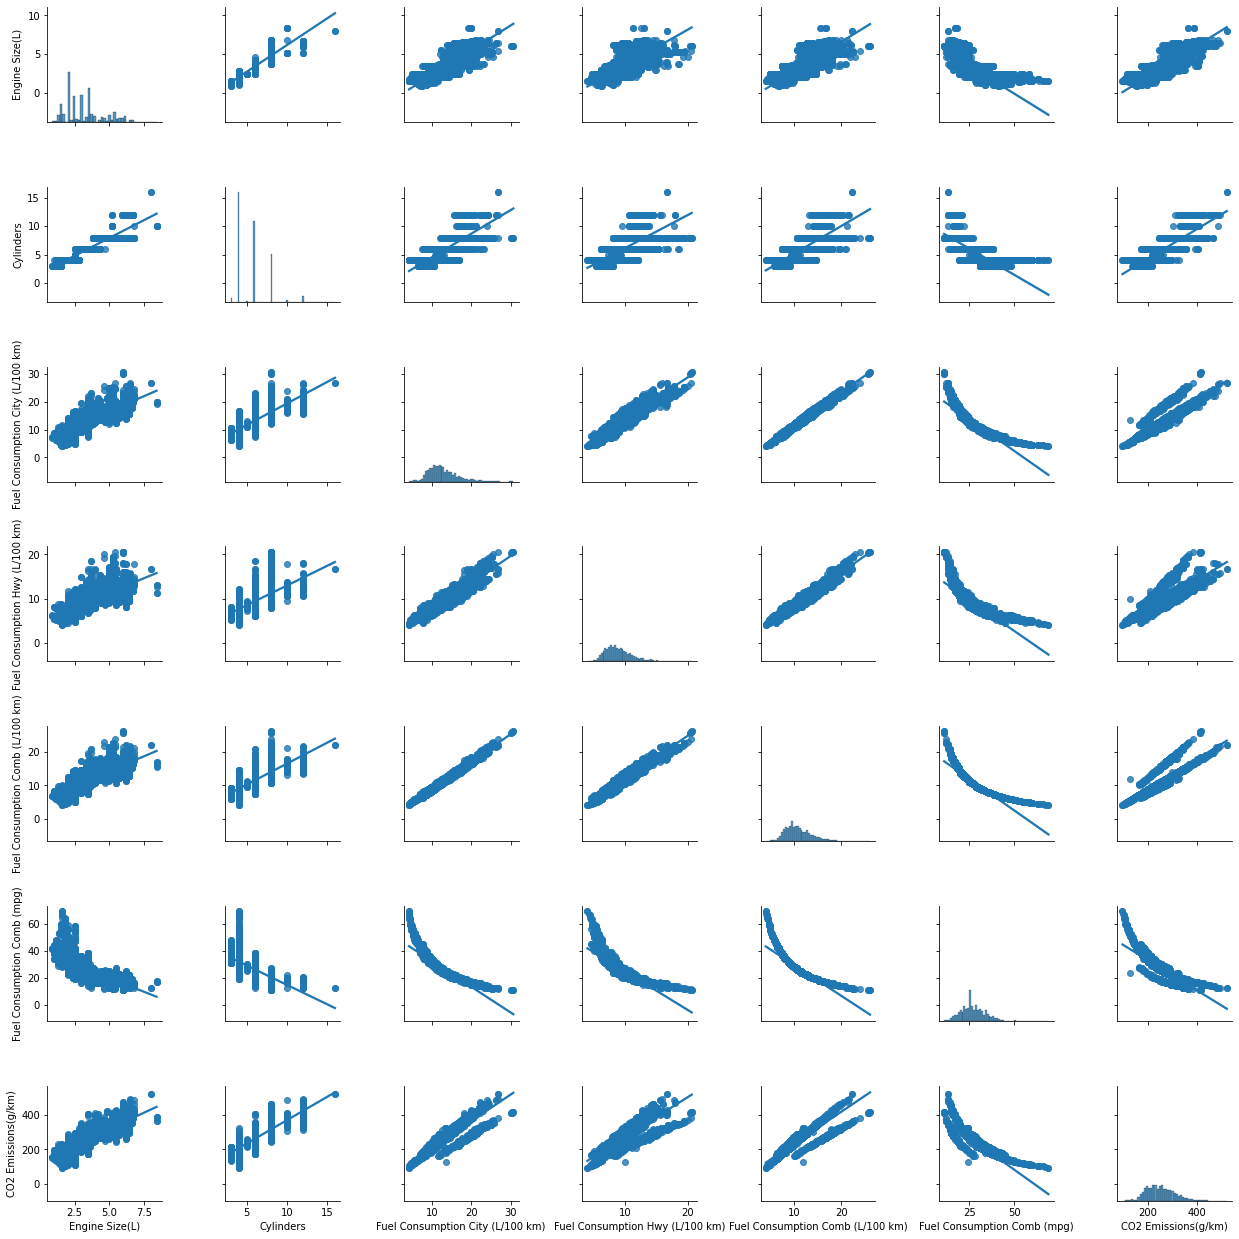

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(df,kind="reg")
plt.show()

Inference
- Fuel Consumption Combo shows a -ve relation with all the other numerical variables.
- Fuel Consumption City and Fuel Consumption Highway are strongly +vely related.

## 1.0 Data Cleaning

In [ ]:
#omitting useless columns
df.drop(['Model'],axis=1,inplace=True)

In [ ]:
#outlier detection (IQR : range between the first and the third quartiles)
df_outlier_filter=df.select_dtypes(include=np.number)
Q1 = df_outlier_filter.quantile(0.25)
Q3 = df_outlier_filter.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine Size(L)                       1.7
Cylinders                            2.0
Fuel Consumption City (L/100 km)     4.6
Fuel Consumption Hwy (L/100 km)      2.8
Fuel Consumption Comb (L/100 km)     3.8
Fuel Consumption Comb (mpg)         10.0
CO2 Emissions(g/km)                 81.0
dtype: float64


In [ ]:
outlier = pd.DataFrame((df_outlier_filter < (Q1 - 1.5 * IQR)) | (df_outlier_filter > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print('Total Outliers in {} : {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total Outliers in Engine Size(L) : 121
Total Outliers in Cylinders : 177
Total Outliers in Fuel Consumption City (L/100 km) : 116
Total Outliers in Fuel Consumption Hwy (L/100 km) : 150
Total Outliers in Fuel Consumption Comb (L/100 km) : 115
Total Outliers in Fuel Consumption Comb (mpg) : 95
Total Outliers in CO2 Emissions(g/km) : 74


In [ ]:
from scipy import stats
from scipy.stats import shapiro

In [ ]:
# Shapiro–Wilk test : The null-hypothesis of this test is that the population is 
# normally distributed. Thus, if the p value is less than the chosen alpha level, 
# then the null hypothesis is rejected and there is evidence that the data tested 
# are not normally distributed.
stat, p_value = shapiro(df_outlier_filter)
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5185065269470215
P-Value: 0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# removal
df2 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(5816, 11)

In [ ]:
df2.reset_index(inplace=True)


In [ ]:
df2.drop(['index'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df2.tail()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5811,VOLVO,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
5812,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
5813,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
5814,VOLVO,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
5815,VOLVO,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [ ]:
# re-check correlation
dnumf = df2.select_dtypes(include=np.number)
print('The numerical columns in the dataset are: ',dnumf.columns)

The numerical columns in the dataset are:  Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [ ]:
correlation2 =  dnumf.corr()
correlation2

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.937348,0.824012,0.761403,0.813454,-0.785161,0.837036
Cylinders,0.937348,1.000000,0.804379,0.729225,0.789102,-0.766213,0.822889
Fuel Consumption City (L/100 km),0.824012,0.804379,1.000000,0.939920,0.992563,-0.960101,0.913272
Fuel Consumption Hwy (L/100 km),0.761403,0.729225,0.939920,1.000000,0.974046,-0.933699,0.896066
Fuel Consumption Comb (L/100 km),0.813454,0.789102,0.992563,0.974046,1.000000,-0.964293,0.920016
Fuel Consumption Comb (mpg),-0.785161,-0.766213,-0.960101,-0.933699,-0.964293,1.000000,-0.925702
CO2 Emissions(g/km),0.837036,0.822889,0.913272,0.896066,0.920016,-0.925702,1.000000


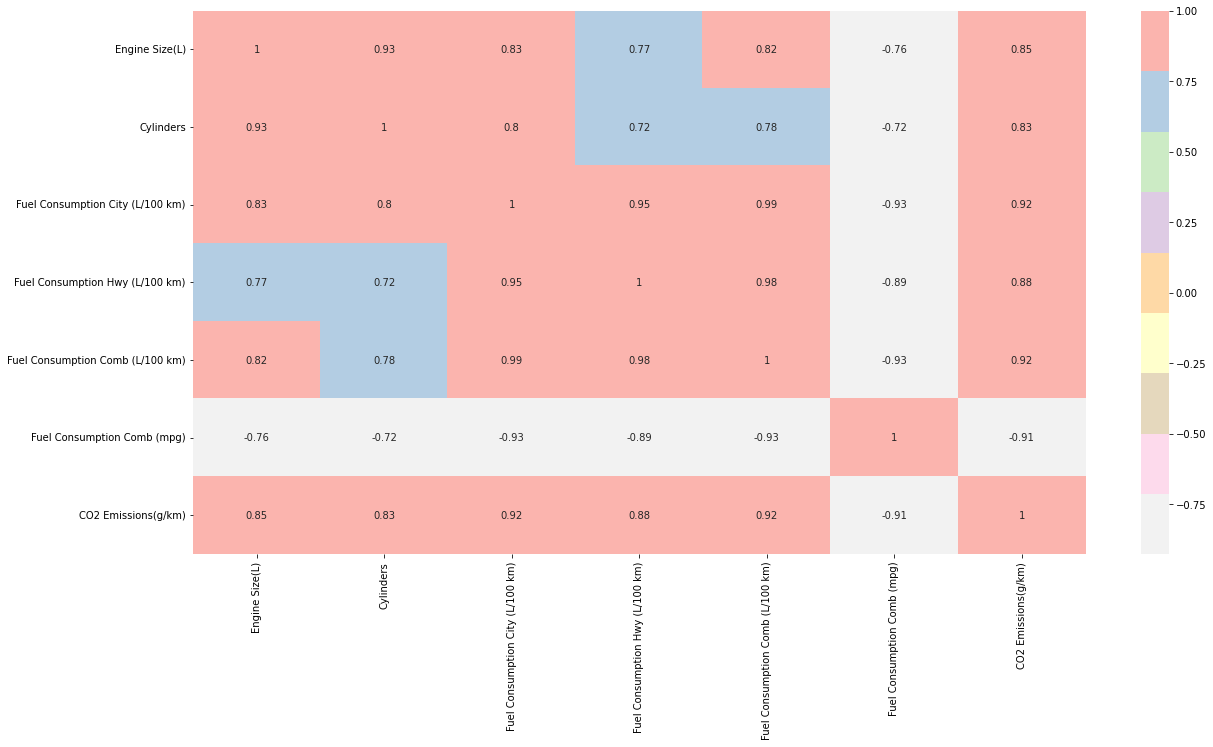

In [ ]:
plt.figure(figsize=(20,10))
correlation2 =num_features.corr(method='pearson')
sns.heatmap(correlation2, annot=True,cmap='Pastel1_r')
plt.show()

In [ ]:
# Filter the numeric and categorical features
df_dummies = pd.get_dummies(data = df[["Fuel Type","Transmission","Make","Vehicle Class"]], drop_first = True)
df_dummies.head()

,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,...,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
dnumf=df.select_dtypes(include=np.number)
dnumf.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [ ]:
df_comb = pd.concat([dnumf, df_dummies], axis = 1)
df_comb.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,...,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 2.0 MODEL : MLR

Multivariate regression is a technique used to measure the degree to which the various independent variable and various dependent variables are linearly related to each other. The relation is said to be linear due to the correlation between the variables. 

Once the multivariate regression is applied to the dataset, this method is then used to predict the behaviour of the response variable based on its corresponding predictor variables. 

Multivariate regression is commonly used as a supervised algorithm in machine learning, a model to predict the behaviour of dependent variables and multiple independent variables.

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

In [ ]:
df_comb.drop(['CO2 Emissions(g/km)'],inplace=True,axis=1)

In [ ]:
df_comb.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,...,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_comb.isna().sum()

Engine Size(L)                      0
Cylinders                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
                                   ..
Vehicle Class_SUV - SMALL           0
Vehicle Class_SUV - STANDARD        0
Vehicle Class_TWO-SEATER            0
Vehicle Class_VAN - CARGO           0
Vehicle Class_VAN - PASSENGER       0
Length: 92, dtype: int64

In [ ]:
X = df_comb.copy()

In [ ]:
X = sm.add_constant(X)
y = df['CO2 Emissions(g/km)']

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_model = sm.OLS(y_train, X_train).fit()
print(MLR_model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.994
Model:                             OLS   Adj. R-squared:                  0.994
Method:                  Least Squares   F-statistic:                     7558.
Date:                 Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                         23:17:45   Log-Likelihood:                -12967.
No. Observations:                 4397   AIC:                         2.612e+04
Df Residuals:                     4304   BIC:                         2.671e+04
Df Model:                           92                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

## 3.0 ANOVA (EVALUATION)

In [ ]:
y_train_pred = MLR_model.predict(X_train) 
y_train_pred.head()

2867    296.004428
4373    238.113783
4511    129.861126
2732    189.146181
1788    378.465034
dtype: float64

In [ ]:
ssr = np.sum((y_train_pred - y_train.mean())**2)
print('Sum of Squared Regression:',ssr)

sse = np.sum((y_train - y_train_pred)**2)
print('Sum of Squared Error:',sse)

sst = np.sum((y_train - y_train.mean())**2)
print('Sum of Sqaured Total:',sst)

print('Sum of SSR and SSE is:',ssr+sse)

# snet = ssr+sse (approx)

Sum of Squared Regression: 15154420.335027423
Sum of Squared Error: 93798.42412676493
Sum of Sqaured Total: 15248218.75915397
Sum of SSR and SSE is: 15248218.759154188


In [ ]:
r_sq =MLR_model.rsquared
print('R Squared is:',r_sq)

R Squared is: 0.9938485651597532


In [ ]:
see = np.sqrt(sse/(len(X_train) - 2))    
print("standard error of estimate:",see)

standard error of estimate: 4.619748480630992


In [ ]:
#finally
MLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.994
Model:                             OLS   Adj. R-squared:                  0.994
Method:                  Least Squares   F-statistic:                     7558.
Date:                 Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                         23:21:05   Log-Likelihood:                -12967.
No. Observations:                 4397   AIC:                         2.612e+04
Df Residuals:                     4304   BIC:                         2.671e+04
Df Model:                           92                                         
Covariance Type:             nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     85.6831      2.566     33.397      0.000      80.653      90.713
Engine Size(L)                             0.4582      0.212      2.157      0.031       0.042       0.875
Cylinders                                  0.6558      0.149      4.412      0.000       0.364       0.947
Fuel Consumption City (L/100 km)           6.4878      0.972      6.678      0.000       4.583       8.393
Fuel Consumption Hwy (L/100 km)            5.4593      0.815      6.700      0.000       3.862       7.057
Fuel Consumption Comb (L/100 km)           7.8371      1.766      4.437      0.000       4.374      11.300
Fuel Consumption Comb (mpg)               -0.9159      0.038    -24.358      0.000      -0.990      -0.842
Fuel Type_E                             -137.7132      0.770   -178.883      0.000    -139.223    -136.204
Fuel Type_N                             -110.3574      4.720    -23.379      0.000    -119.612    -101.103
Fuel Type_X                              -30.0842      0.514    -58.577      0.000     -31.091     -29.077
Fuel Type_Z                              -29.1457      0.546    -53.400      0.000     -30.216     -28.076
Transmission_A4                           -6.6432      1.483     -4.480      0.000      -9.550      -3.736
Transmission_A5                           -1.9182      1.361     -1.409      0.159      -4.587       0.750
Transmission_A6                           -2.7288      1.162     -2.349      0.019      -5.006      -0.452
Transmission_A7                            1.7608      1.468      1.200      0.230      -1.117       4.638
Transmission_A8                           -1.5805      1.185     -1.334      0.182      -3.904       0.743
Transmission_A9                           -0.1803      1.245     -0.145      0.885      -2.622       2.261
Transmission_AM5                           4.8521      4.036      1.202      0.229      -3.060      12.764
Transmission_AM6                           2.2939      1.320      1.738      0.082      -0.294       4.882
Transmission_AM7                           0.4030      1.233      0.327      0.744      -2.015       2.821
Transmission_AM8                          -0.6413      1.459     -0.439      0.660      -3.503       2.220
Transmission_AM9                           5.4966      4.926      1.116      0.265      -4.160      15.153
Transmission_AS10                         -0.4927      1.259     -0.391      0.696      -2.961       1.975
Transmission_AS4                          -2.0561      4.977     -0.413      0.680     -11.814       7.702
Transmission_AS5                          -2.5810      1.683     -1.533      0.125      -5.881       0.719
Transmission_AS6                          -1.4381      1.185     -1.214     

## 4.0 Performance

In [ ]:
train_pred = MLR_model.predict(X_train)
test_pred = MLR_model.predict(X_test)

In [ ]:
train_pred.head()

2867    296.004428
4373    238.113783
4511    129.861126
2732    189.146181
1788    378.465034
dtype: float64

In [ ]:
test_pred.head()

5358    191.091264
5732    161.262957
2502    186.290403
1361    341.915671
3335    302.461879
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Mean Square Error
mse_train = round(mean_squared_error(y_train, train_pred),4)
print("Mean Squared Error (MSE) on training set: ", mse_train)
mse_test = round(mean_squared_error(y_test, test_pred),4)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  21.3324
Mean Squared Error (MSE) on test set:  28.1574


In [ ]:
# R Mean Square Error 
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  4.6187
Root Mean Squared Error (RMSE) on test set:  5.3064


### CONCLUSION : 

ACCURACY FOR TRAIN DATA : 95.4%

ACCURACY FOR TEST DATA : 94.7%

# *Trends*
---

In [ ]:
df_t = pd.read_excel("survey_data.xlsx")

In [ ]:
df_tre = pd.read_excel("survey_data.xlsx")

In [ ]:
df_t.head(5)

,Timestamp,Email Address,How many cars do you own?,How often do you use your car?,Company of the vehicle?,Car model?,Vehicle Class,Size of engine used in Litres,Number of Cylinders?,Fuel Type?,Since how long have you owned this car?,When did you purchase this car?,How often do you service your vehicle?,Does your car leave low-carbon footprint?,Do you believe that your car is eco-friendly?,What do you like about your car?,Would like to know the results of this study?,Please leave your feedback regarding the survey experience.
0,2022-11-04 14:21:52.938,1,1,4,Mahindra,1,SUV - STANDARD,0.0,2,Diesel,9,2012,2,Maybe,Yes,"Fuel Efficiency, Safety, Comfort",Yes,NaN
1,2022-11-04 14:25:06.805,2,1,5,MARUTI SUZUKI,2,COMPACT,1.0,3,Petrol / Gasoline,15,2009,1,Yes,No,"Fuel Efficiency, Low Price, Sustainable",Yes,NaN
2,2022-11-04 14:26:20.513,3,1,2,MARUTI SUZUKI,3,COMPACT,0.0,1,Petrol / Gasoline,9,2012,4,Maybe,Yes,"Fuel Efficiency, Low Price, Sustainable",Yes,NaN
3,2022-11-04 14:30:07.204,4,multiple,5,TOYOTA,4,SUV - STANDARD,0.0,4,Diesel,5,2017,4,Maybe,Maybe,"High Quality, Comfort, Design",No,NaN
4,2022-11-04 14:30:17.370,5,2,3,HYUNDAI,5,COMPACT,1.2,4,Petrol / Gasoline,7,2015,2,NaN,NaN,"Fuel Efficiency, Comfort, Design",NaN,NaN


In [ ]:
df_t.describe()

,Email Address,How often do you use your car?,Car model?,Size of engine used in Litres,Number of Cylinders?,Since how long have you owned this car?,When did you purchase this car?,How often do you service your vehicle?
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,19.500000,3.842105,10.947368,0.744737,2.500000,5.973684,2015.789474,2.736842
std,11.113055,1.103467,7.089952,0.794133,1.688594,3.976192,3.898426,1.266709
min,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2006.000000,1.000000
25%,10.250000,3.000000,5.000000,0.000000,1.000000,3.000000,2013.000000,1.250000
50%,19.500000,4.000000,9.500000,0.500000,2.000000,6.000000,2016.000000,3.000000
75%,28.750000,5.000000,16.750000,1.475000,4.000000,8.750000,2019.000000,4.000000
max,38.000000,5.000000,25.000000,2.000000,6.000000,16.000000,2021.000000,4.000000


In [ ]:
df_t.shape

(38, 18)

In [ ]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 18 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   Timestamp                                                    38 non-null     datetime64[ns]
 1   Email Address                                                38 non-null     int64         
 2   How many cars do you own?                                    38 non-null     object        
 3   How often do you use your car?                               38 non-null     int64         
 4   Company of the vehicle?                                      38 non-null     object        
 5   Car model?                                                   38 non-null     int64         
 6   Vehicle Class                                                38 non-null     object        
 7   Size of engine used

In [ ]:
dupes = df_t.duplicated().sum()
print('There are {} duplicated rows in the data'.format(dupes))

There are 0 duplicated rows in the data


In [ ]:
Nullity_t = pd.DataFrame({'Nullity_t': df_t.isnull().sum(), 'Percentage': (df_t.isnull().sum() / len(df_t))*100})

In [ ]:
Nullity_t.sort_values(by='Percentage', ascending=False)

,Nullity_t,Percentage
Please leave your feedback regarding the survey experience.,30,78.947368
Do you believe that your car is eco-friendly?,4,10.526316
Does your car leave low-carbon footprint?,3,7.894737
Would like to know the results of this study?,1,2.631579
Email Address,0,0.000000
What do you like about your car?,0,0.000000
How often do you service your vehicle?,0,0.000000
When did you purchase this car?,0,0.000000
Since how long have you owned this car?,0,0.000000
Timestamp,0,0.000000


In [ ]:
#df_t.drop(['Please leave your feedback regarding the survey experience.','Would like to know the results of this study?'],inplace=True,axis=1)
df_t.drop(['Would like to know the results of this study?'],inplace=True,axis=1)

In [ ]:
df_t.head(4)

,Timestamp,Email Address,How many cars do you own?,How often do you use your car?,Company of the vehicle?,Car model?,Vehicle Class,Size of engine used in Litres,Number of Cylinders?,Fuel Type?,Since how long have you owned this car?,When did you purchase this car?,How often do you service your vehicle?,Does your car leave low-carbon footprint?,Do you believe that your car is eco-friendly?,What do you like about your car?
0,2022-11-04 14:21:52.938,1,1,4,Mahindra,1,SUV - STANDARD,0.0,2,Diesel,9,2012,2,Maybe,Yes,"Fuel Efficiency, Safety, Comfort"
1,2022-11-04 14:25:06.805,2,1,5,MARUTI SUZUKI,2,COMPACT,1.0,3,Petrol / Gasoline,15,2009,1,Yes,No,"Fuel Efficiency, Low Price, Sustainable"
2,2022-11-04 14:26:20.513,3,1,2,MARUTI SUZUKI,3,COMPACT,0.0,1,Petrol / Gasoline,9,2012,4,Maybe,Yes,"Fuel Efficiency, Low Price, Sustainable"
3,2022-11-04 14:30:07.204,4,multiple,5,TOYOTA,4,SUV - STANDARD,0.0,4,Diesel,5,2017,4,Maybe,Maybe,"High Quality, Comfort, Design"


In [ ]:
df_t.drop(['Timestamp'],inplace=True,axis=1)

In [ ]:
df_t.reset_index(inplace=True)

In [ ]:
df_t.drop(['Email Address'],inplace=True,axis=1)

In [ ]:
df_t.describe(include=np.number)

,index,How often do you use your car?,Car model?,Size of engine used in Litres,Number of Cylinders?,Since how long have you owned this car?,When did you purchase this car?,How often do you service your vehicle?
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,18.500000,3.842105,10.947368,0.744737,2.500000,5.973684,2015.789474,2.736842
std,11.113055,1.103467,7.089952,0.794133,1.688594,3.976192,3.898426,1.266709
min,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2006.000000,1.000000
25%,9.250000,3.000000,5.000000,0.000000,1.000000,3.000000,2013.000000,1.250000
50%,18.500000,4.000000,9.500000,0.500000,2.000000,6.000000,2016.000000,3.000000
75%,27.750000,5.000000,16.750000,1.475000,4.000000,8.750000,2019.000000,4.000000
max,37.000000,5.000000,25.000000,2.000000,6.000000,16.000000,2021.000000,4.000000


Inferences ✅

- A lot of people lie in >= 50% , use their car too often each week.
- Demographics collected consists of common people only (max_size_engine == 2)
- Half the cars are purchased after 2016.
- Quarterly / Half-yearly servicing (based on mean central tendency)


In [ ]:
df_t.describe(include = object)

,How many cars do you own?,Company of the vehicle?,Vehicle Class,Fuel Type?,Does your car leave low-carbon footprint?,Do you believe that your car is eco-friendly?,What do you like about your car?
count,38,38,38,38,35,34,38
unique,3,15,6,2,3,3,23
top,1,MARUTI SUZUKI,COMPACT,Petrol / Gasoline,Maybe,No,"High Quality, Comfort, Design"
freq,17,6,11,23,24,17,7


- 15 unique car companies.
- 17 people own only 1 car.
- 11 people own Compact car.
- Most cars run on petrol.
- Most people think their car maybe has low carbon footprint.
- Most people think their car is not environment sustainable.
- Most selected preferences : High Quality, Comfort, Design

In [ ]:
num_features_t = df_t.select_dtypes(include=np.number)
print('The numerical columns in the dataset are: ',num_features_t.columns)

The numerical columns in the dataset are:  Index(['index', 'How often do you use your car?', 'Car model?',
       'Size of engine used in Litres ', 'Number of Cylinders?',
       'Since how long have you owned this car? ',
       'When did you purchase this car?',
       'How often do you service your vehicle?'],
      dtype='object')


In [ ]:
correlation_t =  num_features_t.corr()
correlation_t

,index,How often do you use your car?,Car model?,Size of engine used in Litres,Number of Cylinders?,Since how long have you owned this car?,When did you purchase this car?,How often do you service your vehicle?
index,1.000000,-0.022040,0.277161,0.109177,-1.778715e-01,-0.066975,0.116035,1.247962e-01
How often do you use your car?,-0.022040,1.000000,0.099092,0.150153,5.801946e-02,0.233103,-0.309508,-1.658808e-01
Car model?,0.277161,0.099092,1.000000,0.073873,-1.760857e-01,-0.117972,0.115951,6.161324e-02
Size of engine used in Litres,0.109177,0.150153,0.073873,1.000000,1.803859e-01,0.016646,0.072092,-1.115711e-01
Number of Cylinders?,-0.177872,0.058019,-0.176086,0.180386,1.000000e+00,0.142901,-0.053374,5.190485e-17
Since how long have you owned this car?,-0.066975,0.233103,-0.117972,0.016646,1.429006e-01,1.000000,-0.907028,-4.038653e-01
When did you purchase this car?,0.116035,-0.309508,0.115951,0.072092,-5.337366e-02,-0.907028,1.000000,3.278089e-01
How often do you service your vehicle?,0.124796,-0.165881,0.061613,-0.111571,5.190485e-17,-0.403865,0.327809,1.000000e+00


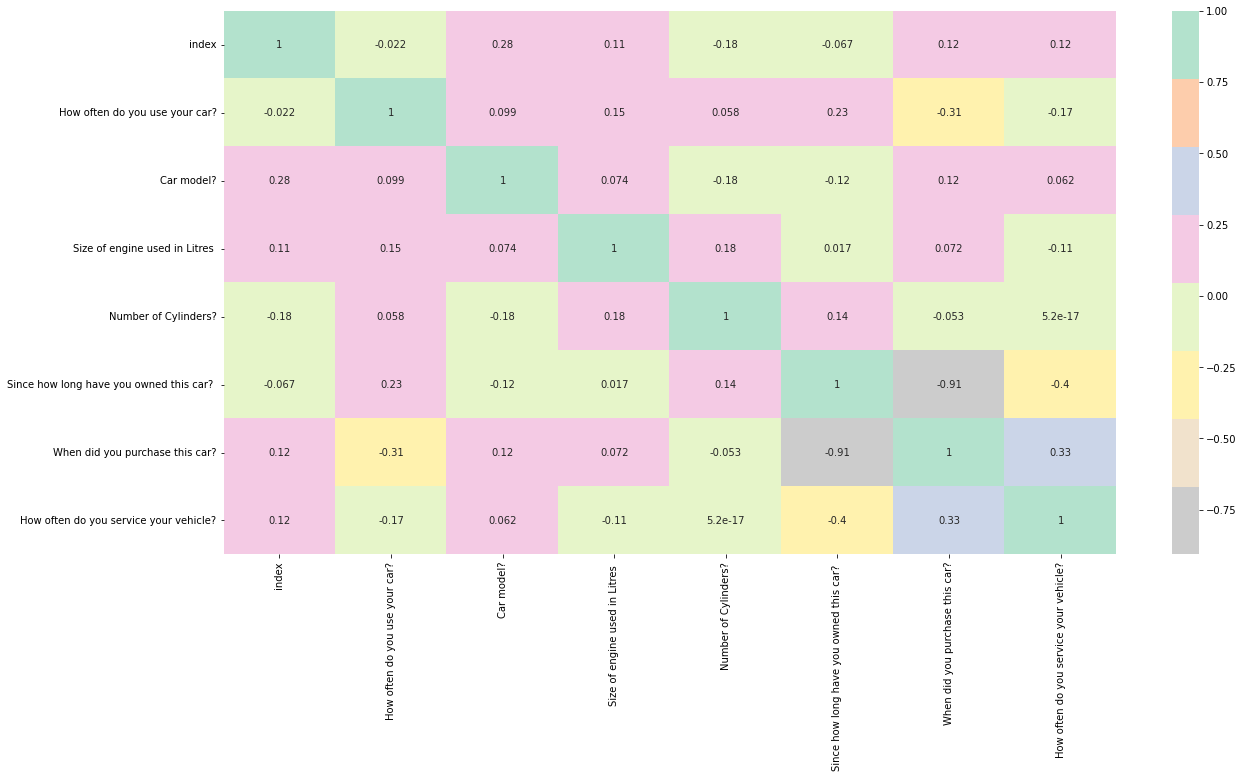

In [ ]:
plt.figure(figsize=(20,10))
correlation_t =num_features_t.corr(method='pearson')
sns.heatmap(correlation_t, annot=True,cmap='Pastel2_r')
plt.show()

Omit irrelevant column from the correlation map such as index and car model.

Inferences ✅

- There is lack of correlation among various factors. 
- Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. 
- Correlation coefficients whose magnitude are less than 0.3 have little if any (linear) correlation. 
- The reason could have been - lack of enough data.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


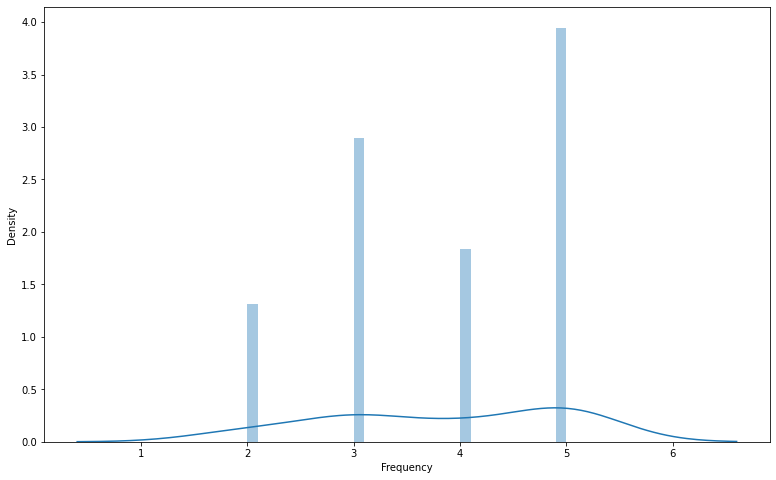

In [ ]:
sns.distplot(df_t['How often do you use your car?'], bins=30, kde=True, axlabel='Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


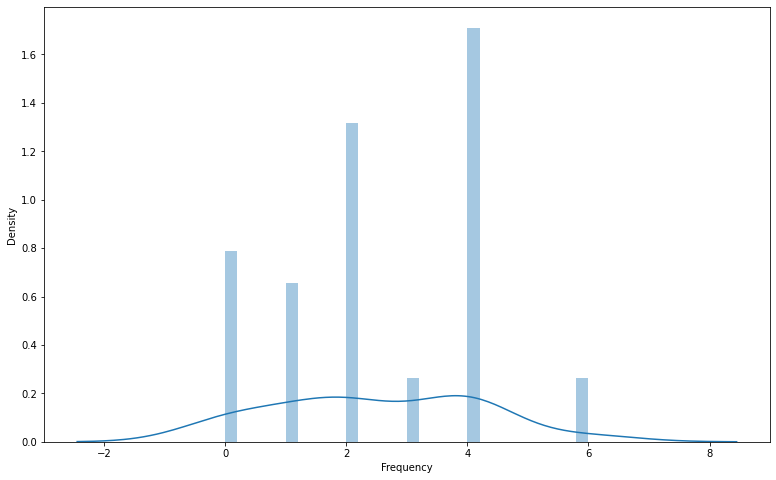

In [ ]:
sns.distplot(df_t['Number of Cylinders?'], bins=30, kde=True, axlabel='Frequency')

In [ ]:
# Highly skewed. No normal distrbution. 
# This concludes out first part.

<Figure size 720x720 with 0 Axes>

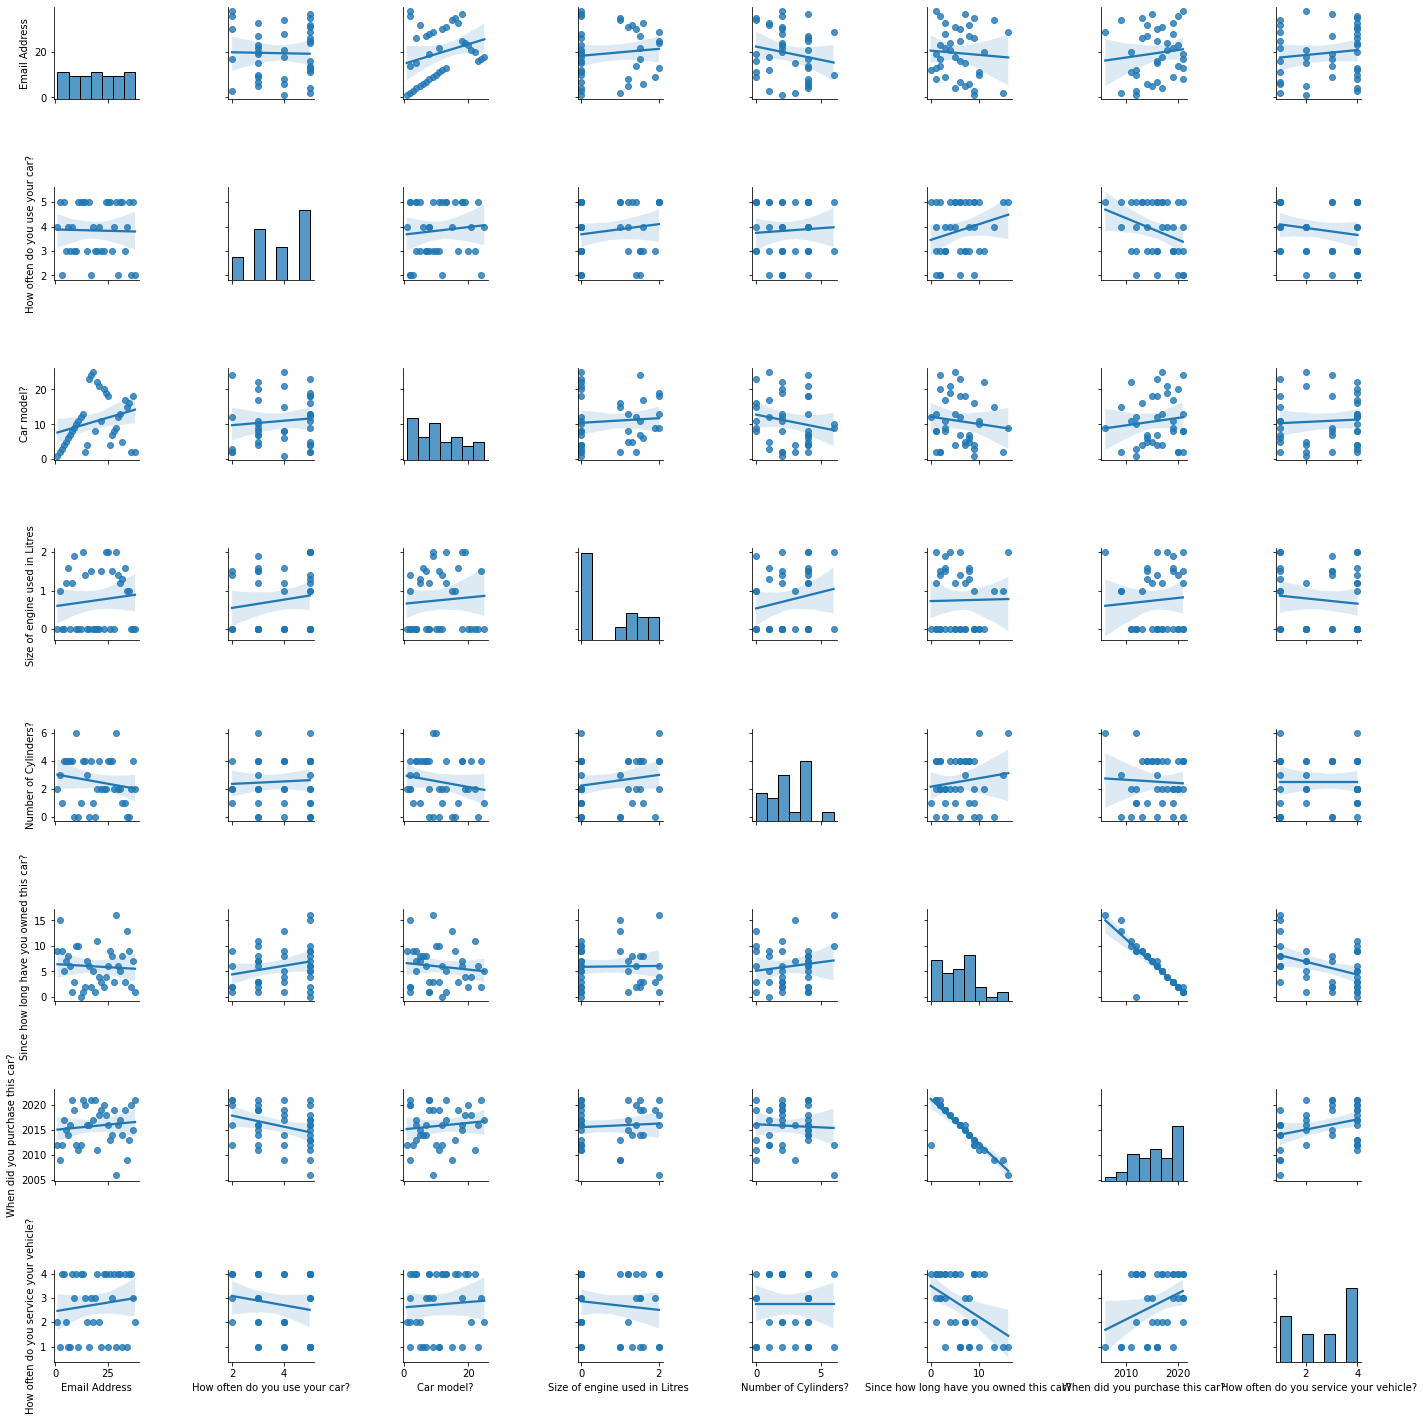

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df_tre,kind="reg")
plt.show()

Weak inferences can be derived from this data.

**Conclusion : We need more Non-null and accurate data** (SCOPE)